<a href="https://colab.research.google.com/github/nuralyyu/Tugas-Python/blob/main/Python_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [129]:
cd /content/drive/MyDrive/FOTO

/content/drive/MyDrive/FOTO


In [130]:
ls

3scene/  daun/  Daun_test.jpg  forest_test.jpg  nnmodel_scene/  potodaun_scene/


In [131]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [132]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("daun")
data = []
labels = []

[INFO] loading images...


In [133]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((64, 64))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [134]:
print(labels)

['GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02',

In [135]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [136]:
print(labels)

[[0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 ...
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]]


In [137]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(438, 64, 64, 3)
(146, 64, 64, 3)


In [138]:
from keras.layers import Convolution2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(64,64,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 62, 62, 8)         224       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 29, 29, 16)        1168      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               313700    
_________________________________________________________________
dense_7 (Dense)              (None, 5)                

In [139]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [151]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=15, batch_size=256)

Epoch 1/15
2/2 [==============================] - 0s 33ms/step - loss: 0.1624 - accuracy: 0.9635 - val_loss: 0.7653 - val_accuracy: 0.7192
Epoch 2/15
2/2 [==============================] - 0s 21ms/step - loss: 0.1838 - accuracy: 0.9543 - val_loss: 0.5213 - val_accuracy: 0.7877
Epoch 3/15
2/2 [==============================] - 0s 21ms/step - loss: 0.1491 - accuracy: 0.9726 - val_loss: 0.5578 - val_accuracy: 0.7808
Epoch 4/15
2/2 [==============================] - 0s 20ms/step - loss: 0.1666 - accuracy: 0.9566 - val_loss: 0.6123 - val_accuracy: 0.7534
Epoch 5/15
2/2 [==============================] - 0s 22ms/step - loss: 0.1506 - accuracy: 0.9772 - val_loss: 0.6151 - val_accuracy: 0.7260
Epoch 6/15
2/2 [==============================] - 0s 20ms/step - loss: 0.1353 - accuracy: 0.9795 - val_loss: 0.5080 - val_accuracy: 0.8082
Epoch 7/15
2/2 [==============================] - 0s 20ms/step - loss: 0.1404 - accuracy: 0.9703 - val_loss: 0.5099 - val_accuracy: 0.8151
Epoch 8/15
2/2 [===========

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


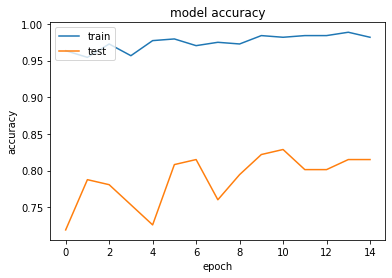

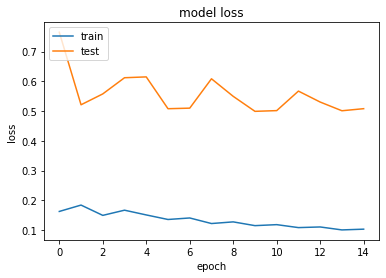

In [152]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [153]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.70      0.84      0.76        25
      GMB_02       0.81      0.73      0.77        30
      GMB_03       0.97      0.89      0.93        35
      GMB_04       0.78      0.75      0.76        28
      GMB_05       0.80      0.86      0.83        28

    accuracy                           0.82       146
   macro avg       0.81      0.81      0.81       146
weighted avg       0.82      0.82      0.82       146



In [154]:
model1.save('potodaun_scene')

INFO:tensorflow:Assets written to: potodaun_scene/assets


In [155]:
import cv2
import matplotlib.pyplot as plt
image1='Daun_test.jpg'

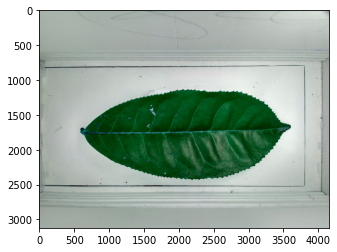

In [156]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [157]:
image_testing = Image.open('Daun_test.jpg')
image_testing = np.array(image_testing.resize((64, 64))) / 255.0
image_testing.shape

(64, 64, 3)

In [158]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 64, 64, 3)


In [160]:
output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[2.7603321e-04 2.9001096e-06 1.5199870e-08 3.8619444e-03 9.9585909e-01]]
['GMB_05']
